# Naive Bayes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#import nbimporter
#import FeatureSelection as fs
#import Scaling as sl
#import DataBalancing as db
import aux_functions as af
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.decomposition import PCA

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Heart Failure Dataset

* ### Comparison of diferent distribytions

{'Accuracy': [0.7977777777777776, 0.6593333333333337, 0.6775555555555551], 'Recall': [0.5331034482758619, 0.4406896551724139, 0.002758620689655172]}


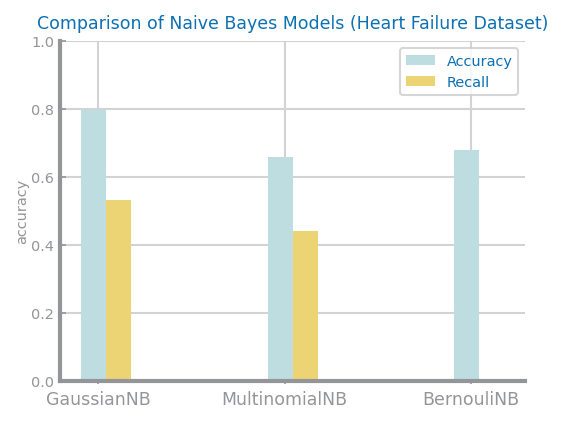

In [10]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernouliNB': BernoulliNB()}

ntests = 50

xvalues = []
acc = []
rec = []
yvalues = {}
for clf in estimators:
    
    test_acc = 0
    test_rec = 0
    for i in range(ntests):
        data = data1.copy()

        y: np.ndarray = data.pop('DEATH_EVENT').values
        X: np.ndarray = data.values
        labels = [pd.unique(y)]

        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

        estimators[clf].fit(trnX, trnY)
        prdY = estimators[clf].predict(tstX)
    
        test_acc += metrics.accuracy_score(tstY, prdY)
        test_rec += metrics.recall_score(tstY, prdY)

    acc.append(test_acc/ntests)
    rec.append(test_rec/ntests)
    xvalues.append(clf)
    
yvalues['Accuracy'] = acc
yvalues['Recall'] = rec
print(yvalues)

plt.figure()
ds.multiple_bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (Heart Failure Dataset)', ylabel='accuracy', percentage=True)
plt.show()

* ### Only using Gaussian from now on
* ### Try data balancing and feature selection (scaling does not affect Naive Bayes)

.
.
.
.
.
.
.
.
.
.
.
.
[0.7979999999999999, 0.7903333333333329, 0.8121111111111112, 0.7883333333333336, 0.8084444444444442, 0.8312222222222218, 0.8128888888888892, 0.8192222222222222, 0.8331111111111105, 0.7848888888888886, 0.7941111111111111, 0.8229999999999995]
[0.5210344827586206, 0.48172413793103436, 0.5658620689655168, 0.7220689655172418, 0.7506896551724143, 0.7706896551724144, 0.7186206896551726, 0.7227586206896555, 0.744827586206897, 0.7355172413793106, 0.7624137931034484, 0.7631034482758626]


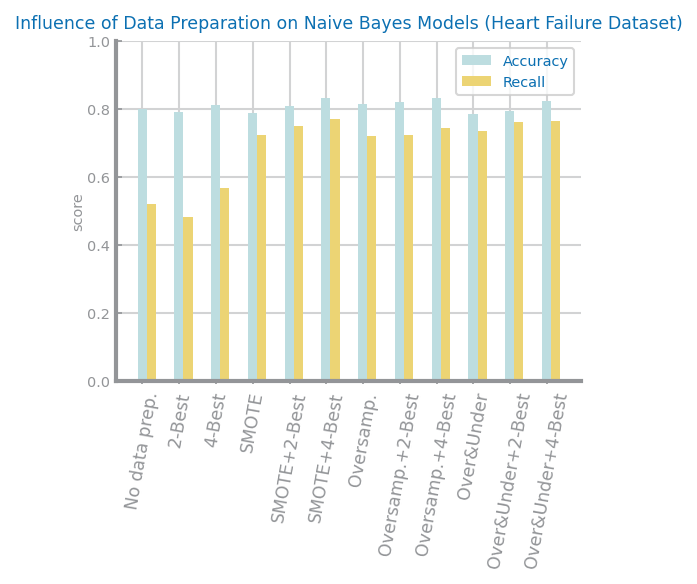

In [12]:
ntests = 100

balancing = ['', 'SMOTE', 'Oversamp.', 'Over&Under'] #'Undersampling', 'SMOTE'
feature_sel = ['', '2-Best', '4-Best']
#scaling = ['No scaling', 'Minmax', 'Zscore']
clf = GaussianNB()

xvalues = []
acc = []
rec = []
yvalues = {}

for bal in balancing:
    for feat in feature_sel:
        data = data1.copy()

        # Feature Selection
        if feat == '2-Best':
            X, y, _ = af.select_k_best(data, 2)

        elif feat == '4-Best':
            X, y, _ = af.select_k_best(data, 4)
        else:
            y: np.ndarray = data.pop('DEATH_EVENT').values
            X: np.ndarray = data.values
            labels = pd.unique(y)
        
        test_acc = 0
        test_rec = 0
        for i in range(ntests):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

            # Balancing
            if bal == 'Oversamp.':
                trnX, trnY = af.balance_oversample(trnX, trnY)
            elif bal == 'SMOTE':
                trnX, trnY = af.balance_SMOTE(trnX, trnY)
            elif bal == 'Over&Under':
                trnX, trnY = af.balance_mix(trnX, trnY)

            clf.fit(trnX, trnY)
            prdY = clf.predict(tstX)
            
            test_acc += metrics.accuracy_score(tstY, prdY)
            test_rec += metrics.recall_score(tstY, prdY)

        acc.append(test_acc/ntests)
        rec.append(test_rec/ntests)
        
        label = ''
        if bal!='':                 label += bal
        if (bal!='' and feat!=''):  label += '+'
        if feat!='':                label += feat
        if (bal=='' and feat==''):  label = 'No data prep.'
        xvalues.append(label)

        print('.')
                  
yvalues['Accuracy'] = acc
yvalues['Recall'] = rec
print(yvalues['Accuracy'])
print(yvalues['Recall'])

plt.figure()
ds.multiple_bar_chart_v2(xvalues, yvalues, title='Influence of Data Preparation on Naive Bayes Models (Heart Failure Dataset)', 
                         ylabel='score', percentage=True, w=6)
plt.xticks(rotation=80)
plt.show()

## Oral Toxicity Dataset

* ### Comparison of diferent distribytions

.
.
.
{'Accuracy': [0.7527798369162342, 0.8512601927353594, 0.7844329132690883], 'Recall': [0.6932432432432432, 0.6150900900900902, 0.6545045045045044]}


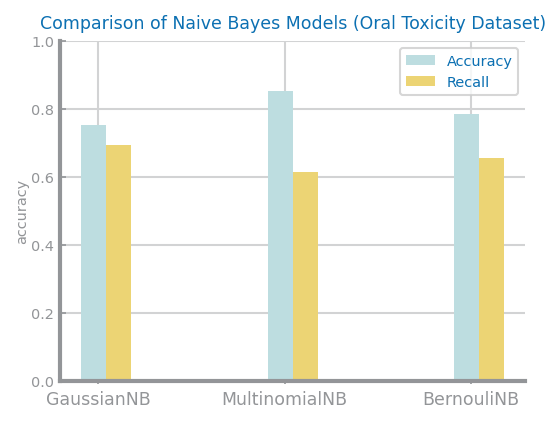

In [13]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernouliNB': BernoulliNB()}

ntests = 20

xvalues = []
acc = []
rec = []
yvalues = {}
for clf in estimators:
    
    test_acc = 0
    test_rec = 0
    for i in range(ntests):
        data = data2.copy()

        # Cast target variable to binary
        data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)

        y: np.ndarray = data.pop(data.columns[-1]).values
        X: np.ndarray = data.values
        labels = pd.unique(y)

        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

        estimators[clf].fit(trnX, trnY)
        prdY = estimators[clf].predict(tstX)
    
        test_acc += metrics.accuracy_score(tstY, prdY)
        test_rec += metrics.recall_score(tstY, prdY)

    acc.append(test_acc/ntests)
    rec.append(test_rec/ntests)
    xvalues.append(clf)
    print('.')
    
yvalues['Accuracy'] = acc
yvalues['Recall'] = rec
print(yvalues)

plt.figure()
ds.multiple_bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (Oral Toxicity Dataset)', ylabel='accuracy', percentage=True)
plt.show()

* ### Only using Gaussian from now on
* ### Try data balancing and feature selection (scaling does not affect Naive Bayes)

.
feat. sel.
.
smote
smote
smote
smote
smote
.
feat. sel.
smote
smote
smote
smote
smote
.
under
under
under
under
under
.
feat. sel.
under
under
under
under
under
.
{'Accuracy': [0.7589325426241661, 0.8148999258710156, 0.8091178650852484, 0.7667902149740548, 0.7240919199406968, 0.7848776871756857], 'Recall': [0.7117117117117117, 0.690990990990991, 0.34774774774774775, 0.6261261261261262, 0.7396396396396396, 0.7090090090090091]}


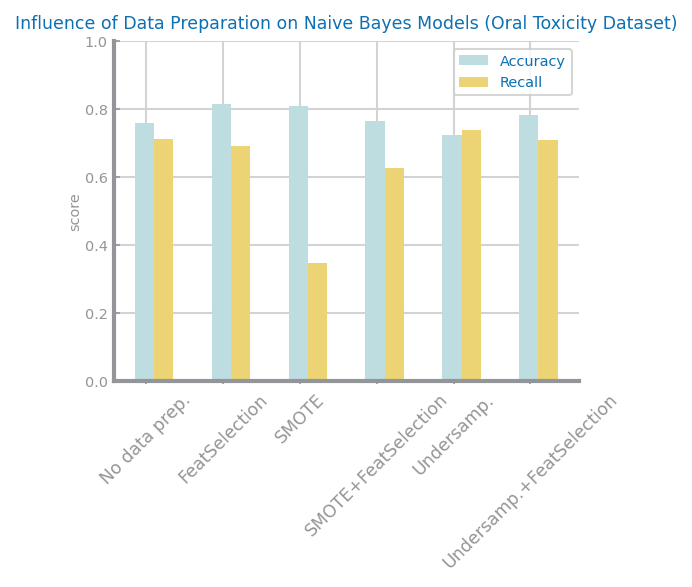

In [15]:
ntests = 5

balancing = ['', 'SMOTE', 'Undersamp.'] #'Undersampling', 'SMOTE'
feature_sel = ['', 'FeatSelection']
#scaling = ['No scaling', 'Minmax', 'Zscore']
clf = GaussianNB()

xvalues = []
acc = []
rec = []
yvalues = {}

for bal in balancing:
    for feat in feature_sel:
        data = data2.copy()

        # Cast target variable to binary
        data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)

        # Feature Selection
        if feat == 'FeatSelection':
            print('feat. sel.')
            X, y = af.best_feature_selection_data2(data)
        elif feat == '':
            y: np.ndarray = data.pop(data.columns[-1]).values
            X: np.ndarray = data.values
            labels = pd.unique(y)
        
        test_acc = 0
        test_rec = 0
        for i in range(ntests):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

            # Balancing
            if bal == 'Undersamp.':
                print('under')
                trnX, trnY = af.balance_undersample(trnX, trnY)
            elif bal == 'SMOTE':
                print('smote')
                trnX, trnY = af.balance_SMOTE(trnX, trnY)
                
            clf.fit(trnX, trnY)
            prdY = clf.predict(tstX)
            test_acc += metrics.accuracy_score(tstY, prdY)
            test_rec += metrics.recall_score(tstY, prdY)

        acc.append(test_acc/ntests)
        rec.append(test_rec/ntests)
            
        label = ''
        if bal!='':                 label += bal
        if (bal!='' and feat!=''):  label += '+'
        if feat!='':                label += feat
        if (bal=='' and feat==''):  label = 'No data prep.'
        xvalues.append(label)
        print('.')
                  
yvalues['Accuracy'] = acc
yvalues['Recall'] = rec
print(yvalues)

plt.figure()
ds.multiple_bar_chart_v2(xvalues, yvalues, title='Influence of Data Preparation on Naive Bayes Models (Oral Toxicity Dataset)', ylabel='score', percentage=True, w=3)
plt.xticks(rotation=45)
plt.show()